In [79]:
#Imports
from local_lib.ManualNeuralNetwork.lmnn.model import lmnn
from local_lib.ManualNeuralNetwork.lmnn.layers.dense import DenseLayer
from local_lib.ManualNeuralNetwork.lmnn.layers.dropout import DropoutLayer
from local_lib.ManualNeuralNetwork.lmnn.layers.output import OutputLayer
from local_lib.ManualNeuralNetwork.lmnn.activations.sigmoid import SigmoidActivation
from local_lib.ManualNeuralNetwork.lmnn.activations.relu import ReluActivation
from local_lib.ManualNeuralNetwork.lmnn.initializers.xavier import XavierInitializer
from local_lib.ManualNeuralNetwork.lmnn.initializers.he import HeInitializer
from local_lib.ManualNeuralNetwork.lmnn.loss.bce import BceLoss
from local_lib.dataset import retreiveDatasetFromCsv
from local_lib.flatten_transformer import FlattenTransformer
from sklearn.pipeline import Pipeline
import numpy as np
from sklearn.model_selection import train_test_split
from local_lib.non_zero_transformer import NonZeroTransformer
from local_lib.mask_transformer import MaskSeuilTransformer
from local_lib.flatten_transformer import FlattenTransformer
from local_lib.dimension_transformer import DimensionTransformer
from local_lib.neural_network_classic_batch import NeuralNetworkMultiLayerClassicStrat
from sklearn.decomposition import PCA
import copy
from sklearn.preprocessing import MinMaxScaler, MaxAbsScaler
from local_lib.plotting import plotHist, plotDecisionBoundaries

In [26]:
dataset = retreiveDatasetFromCsv()
dataset = dataset.sample(frac=1, random_state=42)

pipeline = Pipeline([
    ('flatten_tr', FlattenTransformer()),
    ('non_zero_tr', NonZeroTransformer()),
    ('mask_tr', MaskSeuilTransformer(strategy="combined")),
    ('dimension_tr', DimensionTransformer())])

In [28]:
# Fit and transform data
X = pipeline.fit_transform(dataset["pixel_value"])
y = np.array(list(dataset["class"]))

pca = PCA(n_components=50)
X_pca = pca.fit_transform(X)

X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size=0.20, random_state=0)

In [29]:
y_train = y_train.reshape(1, -1)
y_test = y_test.reshape(1, -1)
X_train_pca = X_train_pca.T
X_test_pca = X_test_pca.T

In [32]:
# Make a copy of the list
y_train_simpler = copy.deepcopy(y_train)
y_train_simpler[y_train_simpler == 2] = 1

y_test_simpler = copy.deepcopy(y_test)
y_test_simpler[y_test_simpler == 2] = 1

print(np.unique(y_train_simpler))
print(np.unique(y_test_simpler))

[0 1]
[0 1]


In [33]:
# Création de la matrice identité
identity_matrix = np.eye(3)
identity_matrix_simpler = np.eye(2)

# Transformation de t1 en t2
y_train_reshaped = identity_matrix[y_train[0]].T
y_test_reshaped = identity_matrix[y_test[0]].T

y_train_simpler_reshaped = identity_matrix_simpler[y_train_simpler[0]].T
y_test_simpler_reshaped = identity_matrix_simpler[y_test_simpler[0]].T

print(y_train_reshaped.shape)
print(y_test_simpler_reshaped.shape)

(3, 4684)
(2, 1172)


### MinMaxScaler
Trying out sample shapes : 
 - (8,8,8,8) _base prediction_
 - (8,16,32,64) _should diverge and so improve prediction_
 - (64,32,16,8) _should confirm intuition_

In [34]:
pipeline = Pipeline([
    ('MinMaxScaler', MinMaxScaler())])

X_train_pca_scaled = pipeline.fit_transform(X_train_pca)
X_test_pca_scaled = pipeline.fit_transform(X_test_pca)
print(X_train_pca_scaled.shape)
print(X_test_pca_scaled.shape)

(50, 4684)
(50, 1172)


**(8,8,8,8)**

In [69]:
mnn = NeuralNetworkMultiLayerClassicStrat(X_train_pca_scaled, y_train_simpler_reshaped, dimensions=(8,8,8,8), n_iter=2800, lr=0.1, strategy="sub", sub_parts=5)
hist = mnn.fit(X_train_pca_scaled, X_test_pca_scaled, y_train_simpler_reshaped,y_test_simpler_reshaped)

100%|██████████| 559/559 [00:09<00:00, 60.56it/s]


In [70]:
y_pred = mnn.predict(X_test_pca_scaled)

Least accuracy :0.9146757679180887
Least recall :0.9146757679180887
Least precision :0.9142450284581525


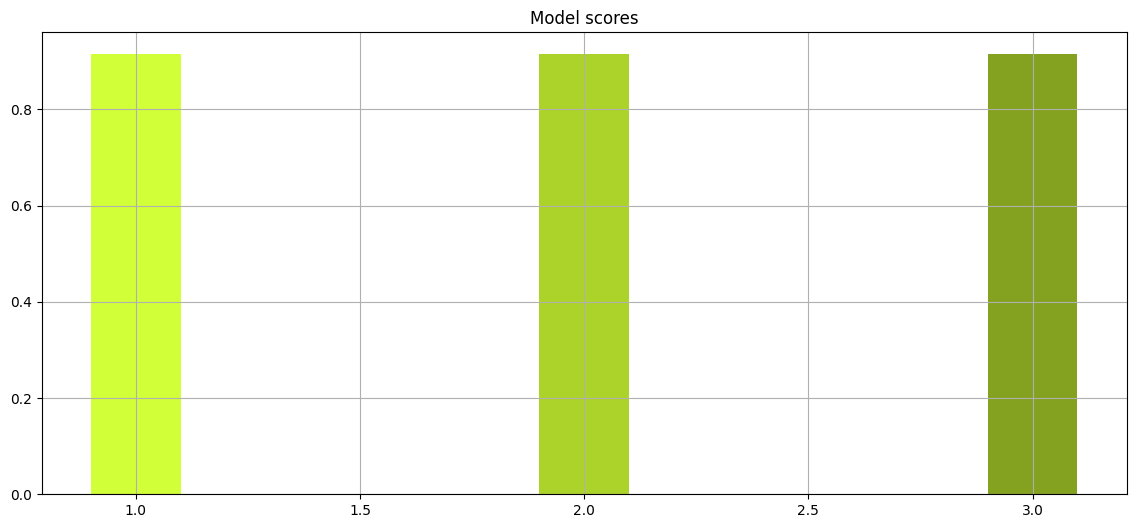

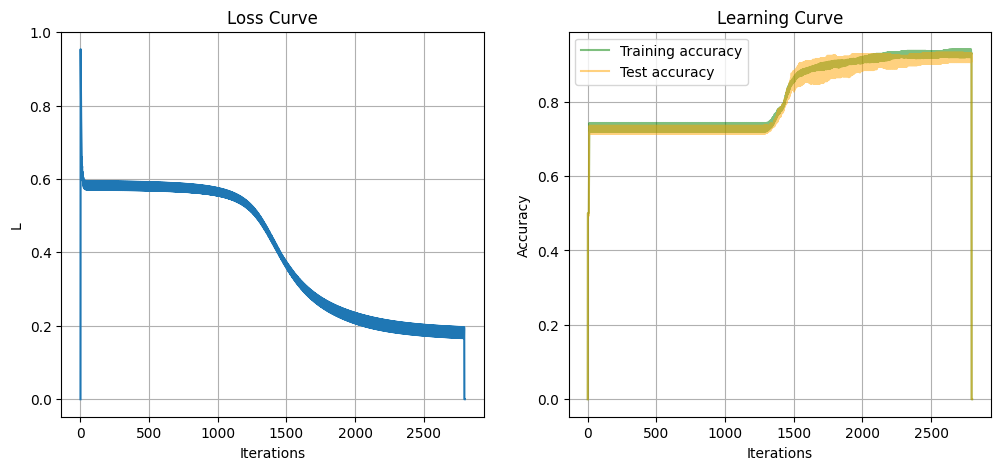

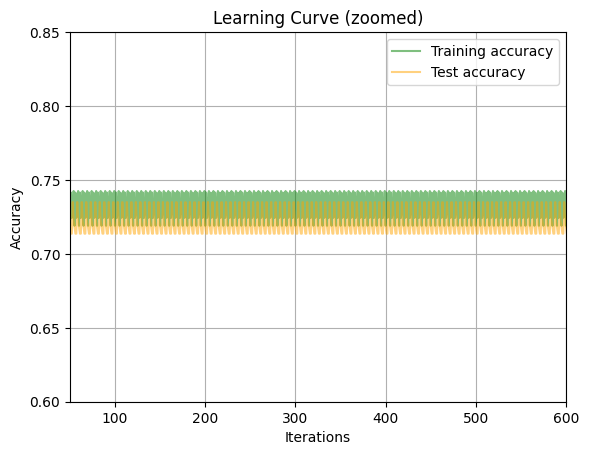

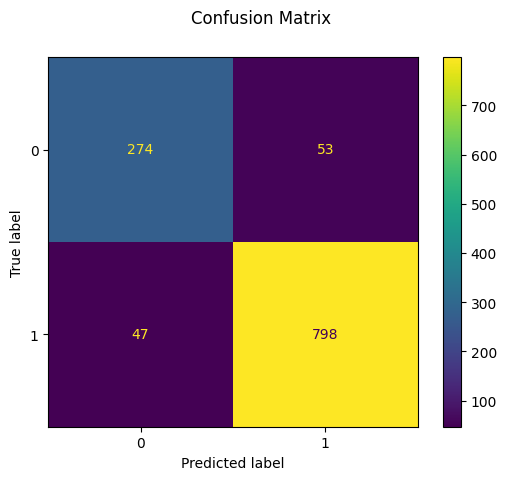

In [71]:
plotHist(hist, y_test_simpler_reshaped,y_pred, zoomx=(50,600), zoomy=(0.6,0.85))

**(8,16,32,64)**

In [72]:
from local_lib.neural_network_classic_batch import NeuralNetworkMultiLayerClassicStrat
mnn = NeuralNetworkMultiLayerClassicStrat(X_train_pca_scaled, y_train_simpler_reshaped, dimensions=(8,16,32,64), n_iter=2800, lr=0.1, strategy="sub", sub_parts=5)
hist = mnn.fit(X_train_pca_scaled, X_test_pca_scaled, y_train_simpler_reshaped,y_test_simpler_reshaped)

100%|██████████| 559/559 [00:22<00:00, 25.06it/s]


In [73]:
y_pred = mnn.predict(X_test_pca_scaled)

Least accuracy :0.9308873720136519
Least recall :0.9308873720136519
Least precision :0.9301938561217572


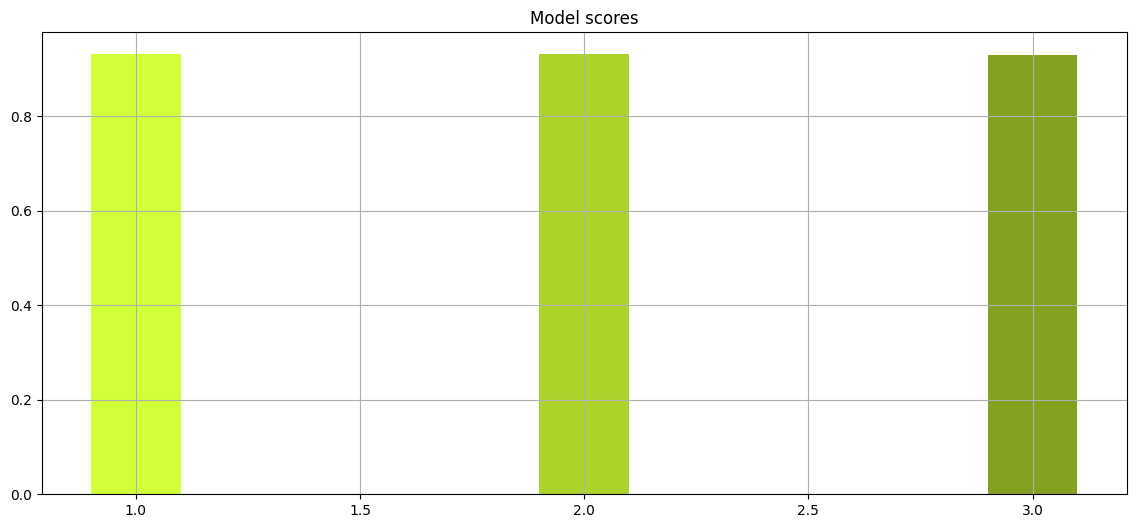

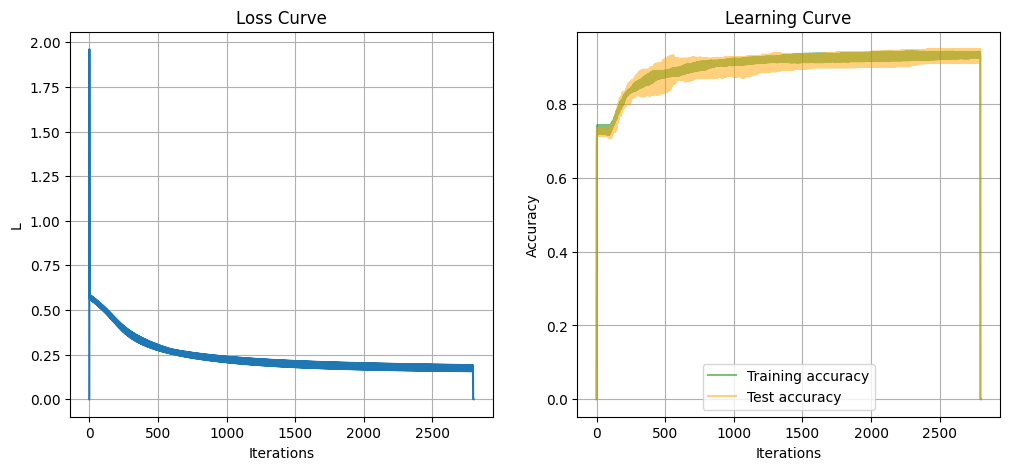

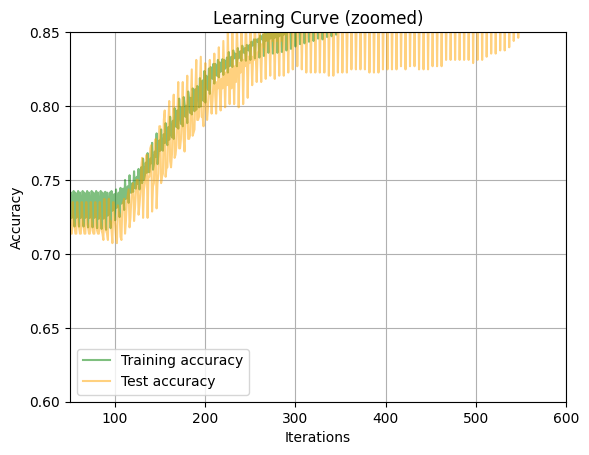

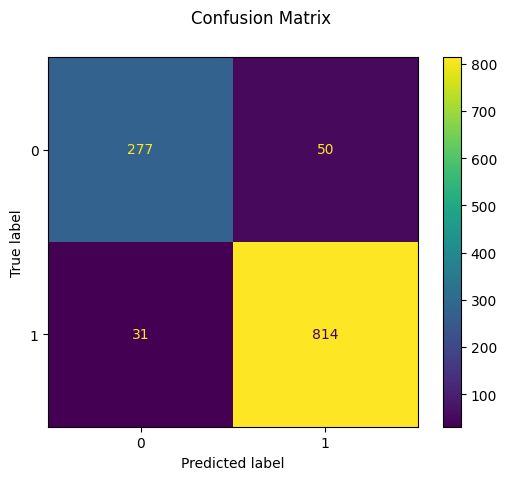

In [74]:
plotHist(hist, y_test_simpler_reshaped,y_pred, zoomx=(50,600), zoomy=(0.6,0.85))

**(64,32,16,8)**

In [75]:
mnn = NeuralNetworkMultiLayerClassicStrat(X_train_pca_scaled, y_train_simpler_reshaped, dimensions=(8,16,32,64), n_iter=2800, lr=0.1, strategy="sub", sub_parts=5)
hist = mnn.fit(X_train_pca_scaled, X_test_pca_scaled, y_train_simpler_reshaped,y_test_simpler_reshaped)

100%|██████████| 559/559 [00:22<00:00, 24.57it/s]


In [76]:
y_pred = mnn.predict(X_test_pca_scaled)

Least accuracy :0.9291808873720137
Least recall :0.9291808873720137
Least precision :0.9287870890015862


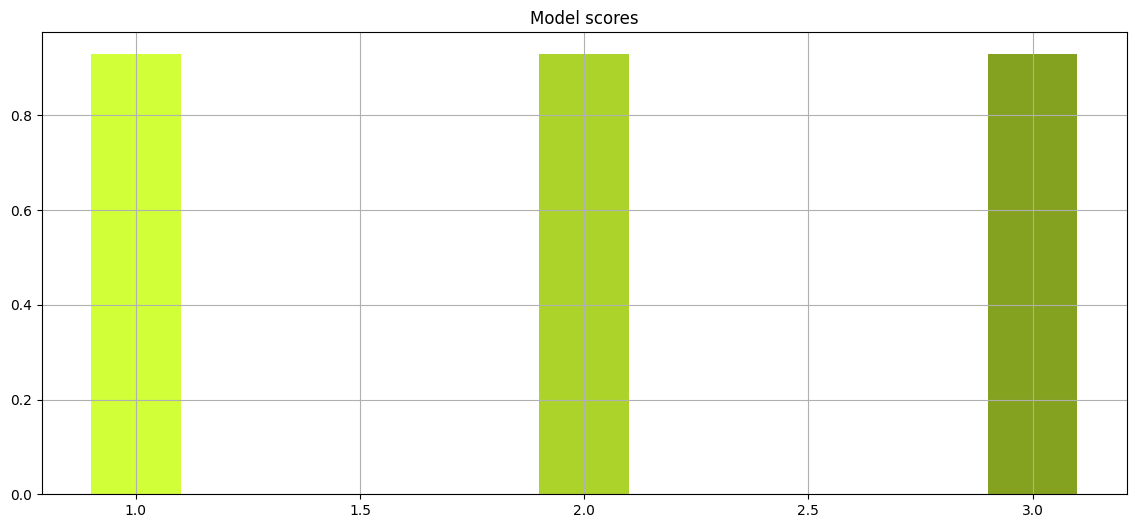

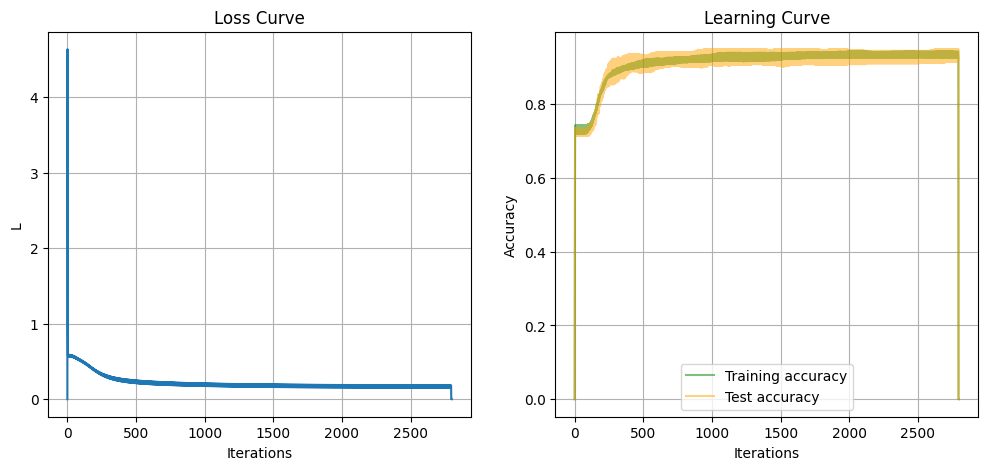

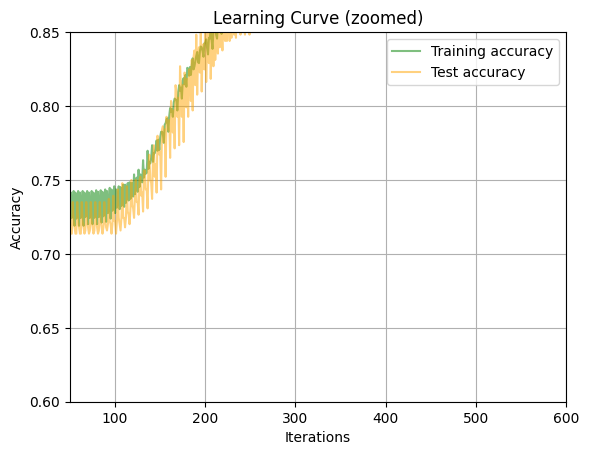

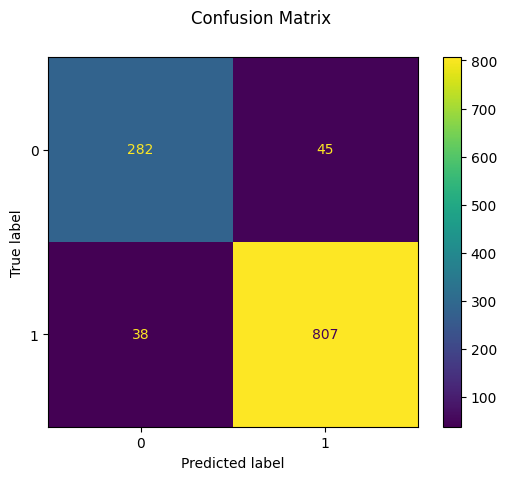

In [77]:
plotHist(hist, y_test_simpler_reshaped,y_pred, zoomx=(50,600), zoomy=(0.6,0.85))

### MaxAbsScaler
Trying out sample shapes : 
 - (8,8,8,8) _base prediction_
 - (8,16,32,64) _should diverge and so improve prediction_
 - (64,32,16,8) _should confirm intuition_

In [80]:
pipeline = Pipeline([
    ('MaxAbsScaler', MaxAbsScaler())])

X_train_pca_scaled = pipeline.fit_transform(X_train_pca)
X_test_pca_scaled = pipeline.fit_transform(X_test_pca)
print(X_train_pca_scaled.shape)
print(X_test_pca_scaled.shape)

(50, 4684)
(50, 1172)


**(8,8,8,8)**

In [82]:
mnn = NeuralNetworkMultiLayerClassicStrat(X_train_pca_scaled, y_train_simpler_reshaped, dimensions=(8,8,8,8), n_iter=2800, lr=0.1, strategy="sub", sub_parts=5)
hist = mnn.fit(X_train_pca_scaled, X_test_pca_scaled, y_train_simpler_reshaped,y_test_simpler_reshaped)

100%|██████████| 559/559 [00:09<00:00, 61.30it/s]


In [83]:
y_pred = mnn.predict(X_test_pca_scaled)

Least accuracy :0.9266211604095563
Least recall :0.9266211604095563
Least precision :0.9261627480887958


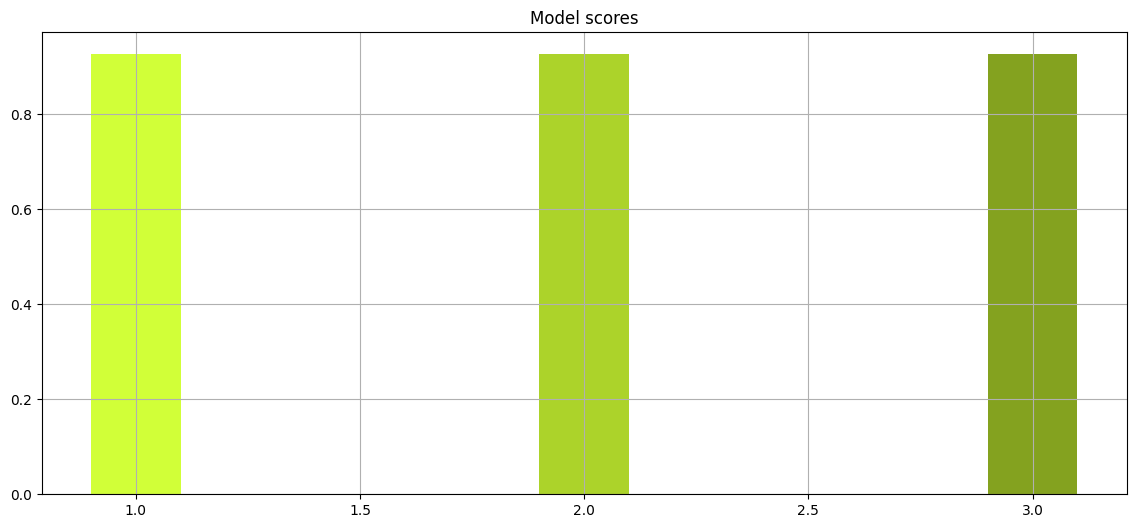

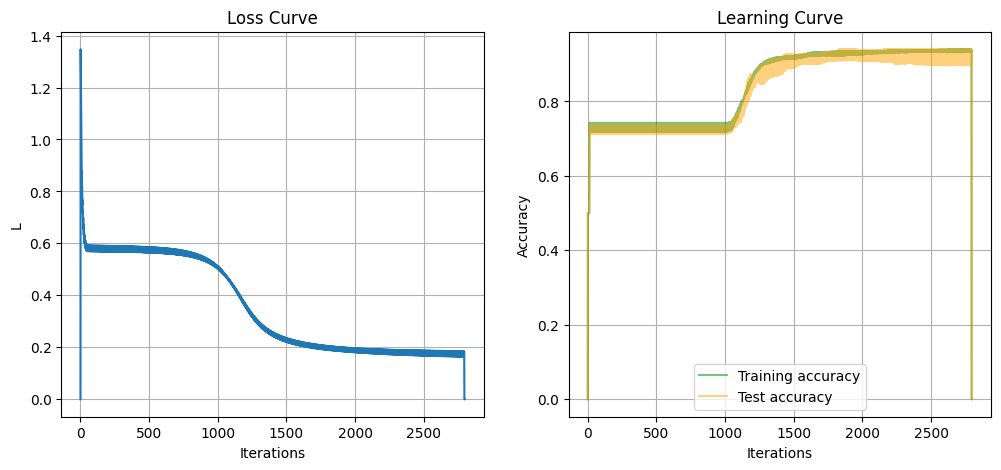

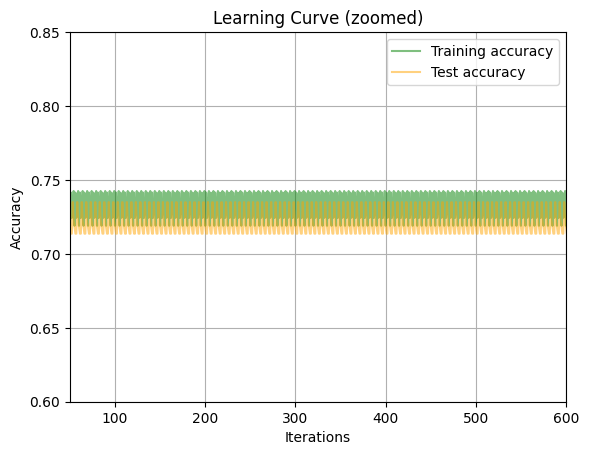

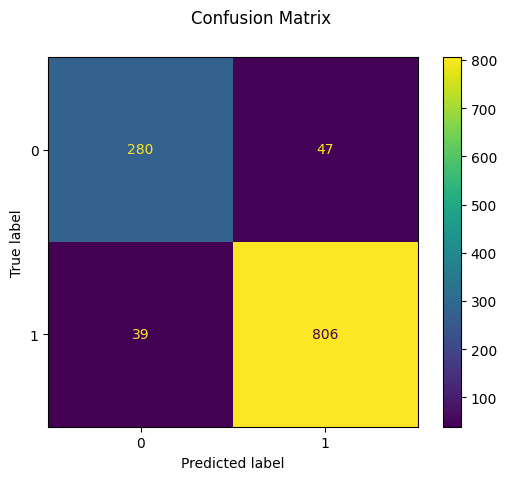

In [84]:
plotHist(hist, y_test_simpler_reshaped,y_pred, zoomx=(50,600), zoomy=(0.6,0.85))

**(8,16,32,64)**

In [85]:
mnn = NeuralNetworkMultiLayerClassicStrat(X_train_pca_scaled, y_train_simpler_reshaped, dimensions=(8,16,32,64), n_iter=2800, lr=0.1, strategy="sub", sub_parts=5)
hist = mnn.fit(X_train_pca_scaled, X_test_pca_scaled, y_train_simpler_reshaped,y_test_simpler_reshaped)

100%|██████████| 559/559 [00:23<00:00, 24.12it/s]


In [86]:
y_pred = mnn.predict(X_test_pca_scaled)

Least accuracy :0.9215017064846417
Least recall :0.9215017064846417
Least precision :0.9207503294922414


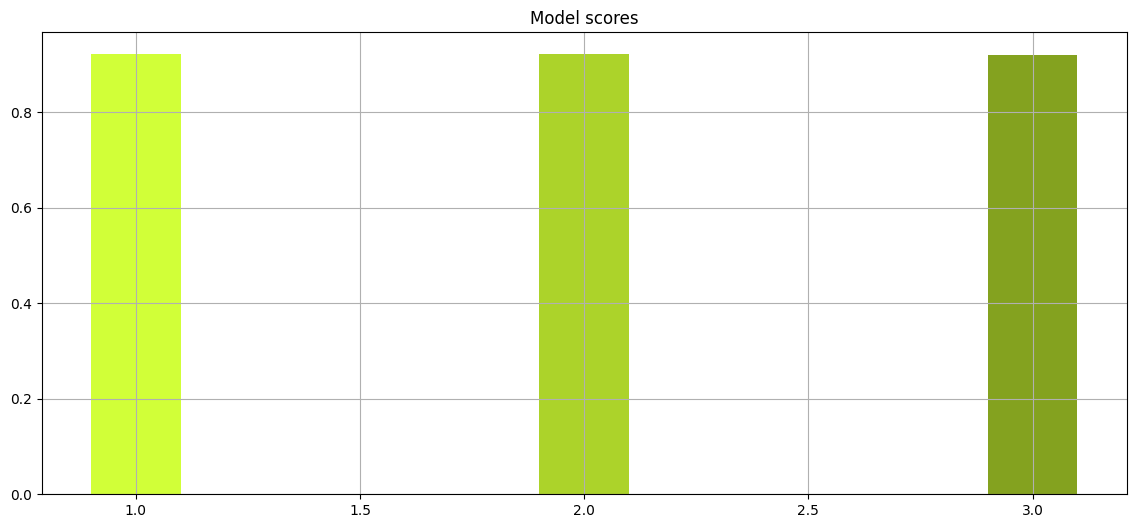

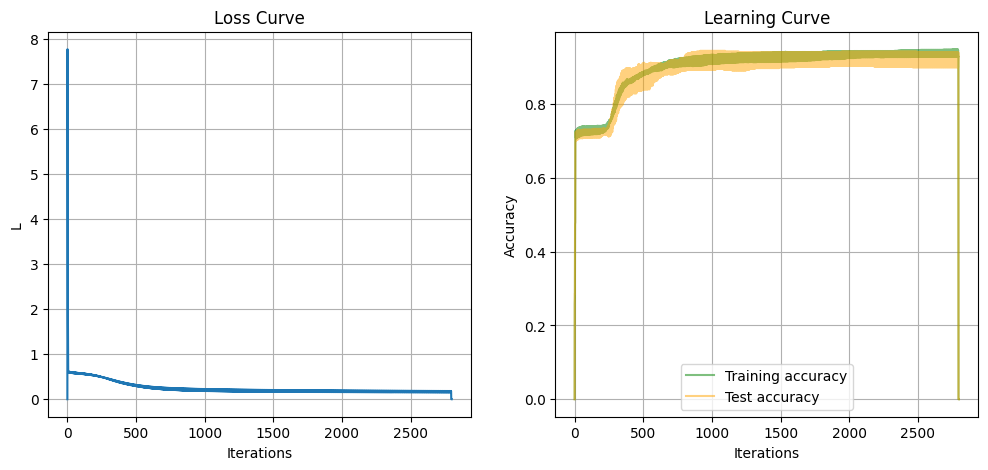

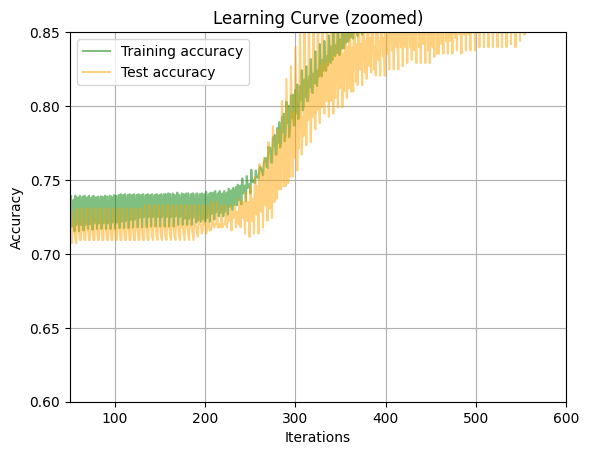

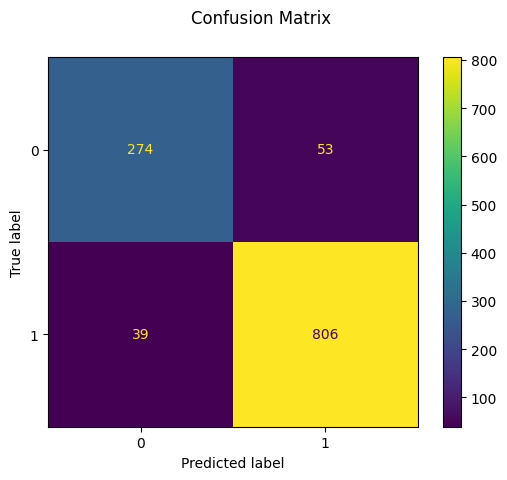

In [87]:
plotHist(hist, y_test_simpler_reshaped,y_pred, zoomx=(50,600), zoomy=(0.6,0.85))

**(64,32,16,8)**

In [88]:
mnn = NeuralNetworkMultiLayerClassicStrat(X_train_pca_scaled, y_train_simpler_reshaped, dimensions=(64,32,16,8), n_iter=2800, lr=0.1, strategy="sub", sub_parts=5)
hist = mnn.fit(X_train_pca_scaled, X_test_pca_scaled, y_train_simpler_reshaped,y_test_simpler_reshaped)

100%|██████████| 559/559 [00:23<00:00, 23.50it/s]


In [89]:
y_pred = mnn.predict(X_test_pca_scaled)

Least accuracy :0.9308873720136519
Least recall :0.9308873720136519
Least precision :0.9302146063130609


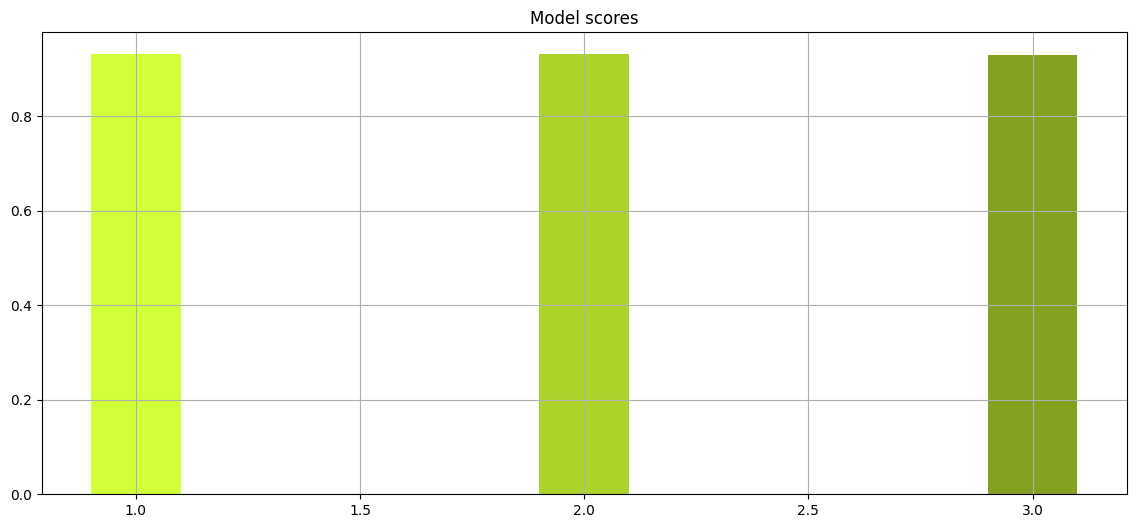

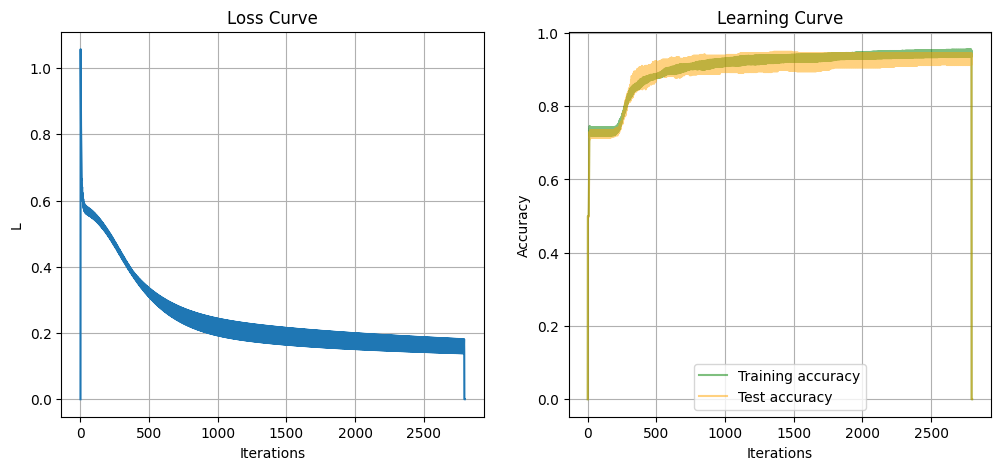

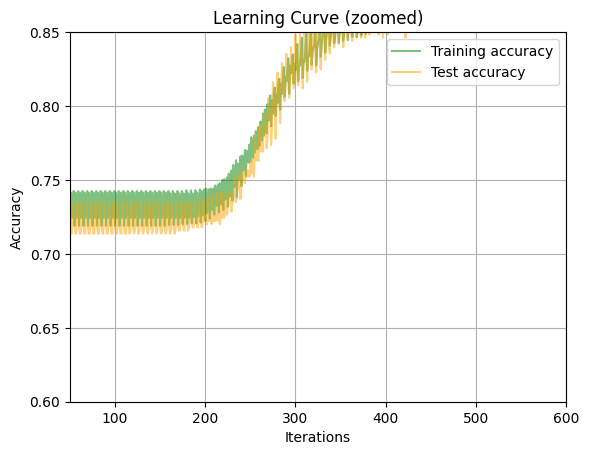

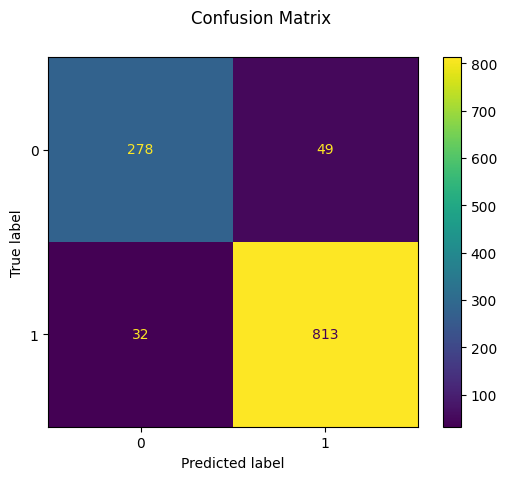

In [90]:
plotHist(hist, y_test_simpler_reshaped,y_pred, zoomx=(50,600), zoomy=(0.6,0.85))